In [16]:
from deepforest import deepforest
from deepforest import preprocess
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Load model and set multi-GPU (not implemented yet)
model = deepforest.deepforest()
model.config["multi-gpu"] = 0
model.use_release()

Reading config file: /Users/ben/miniconda3/envs/crowns/lib/python3.7/site-packages/deepforest/data/deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/v0.2.1 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.2.1

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
path = "/Users/ben/Dropbox/Weecology/Crowns/problematic/2019_DELA_5_421000_3606000_image.tif"
raster = Image.open(path)

/Users/ben/miniconda3/envs/crowns/lib/python3.7/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [6]:
numpy_array = np.array(raster)

In [8]:
windows = preprocess.compute_windows(numpy_array, patch_size = 400, patch_overlap=0.05)

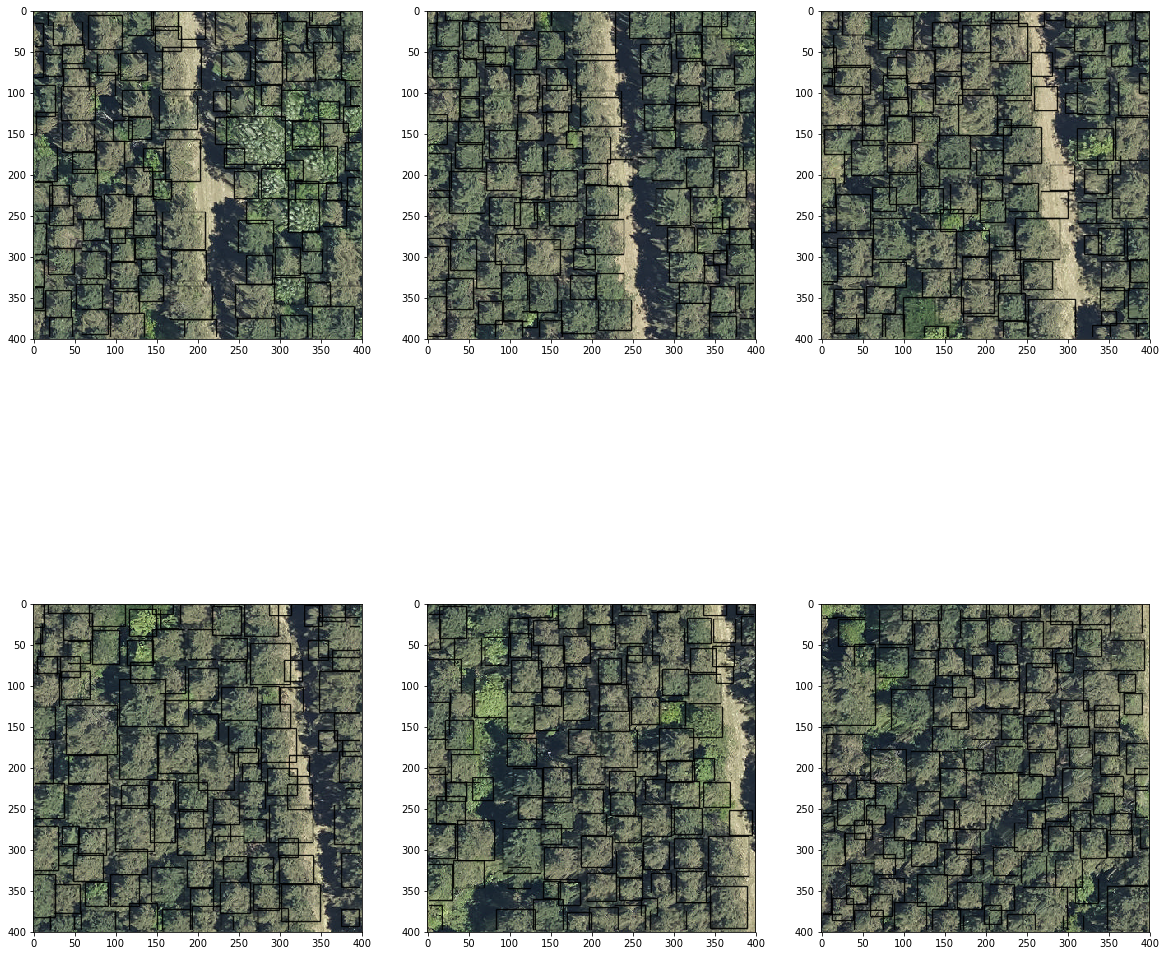

In [39]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,30))
ax = ax.flatten()
for x in np.arange(6):
    crop = numpy_array[windows[x].indices()]
    crop = model.predict_image(raw_image = crop[:,:,::-1],return_plot=True)
    ax[x].imshow(crop[:,:,::-1])

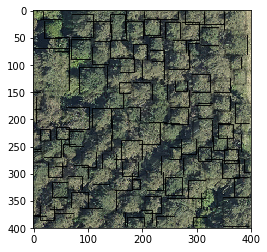

In [37]:
boxes = model.predict_image(raw_image = crop[:,:,::-1],return_plot=False)

In [43]:
prediction = model.predict_tile(path, patch_size=400,patch_overlap=0.05, return_plot=True)


63027 predictions in overlapping windows, applying non-max supression
51728 predictions kept after non-max suppression


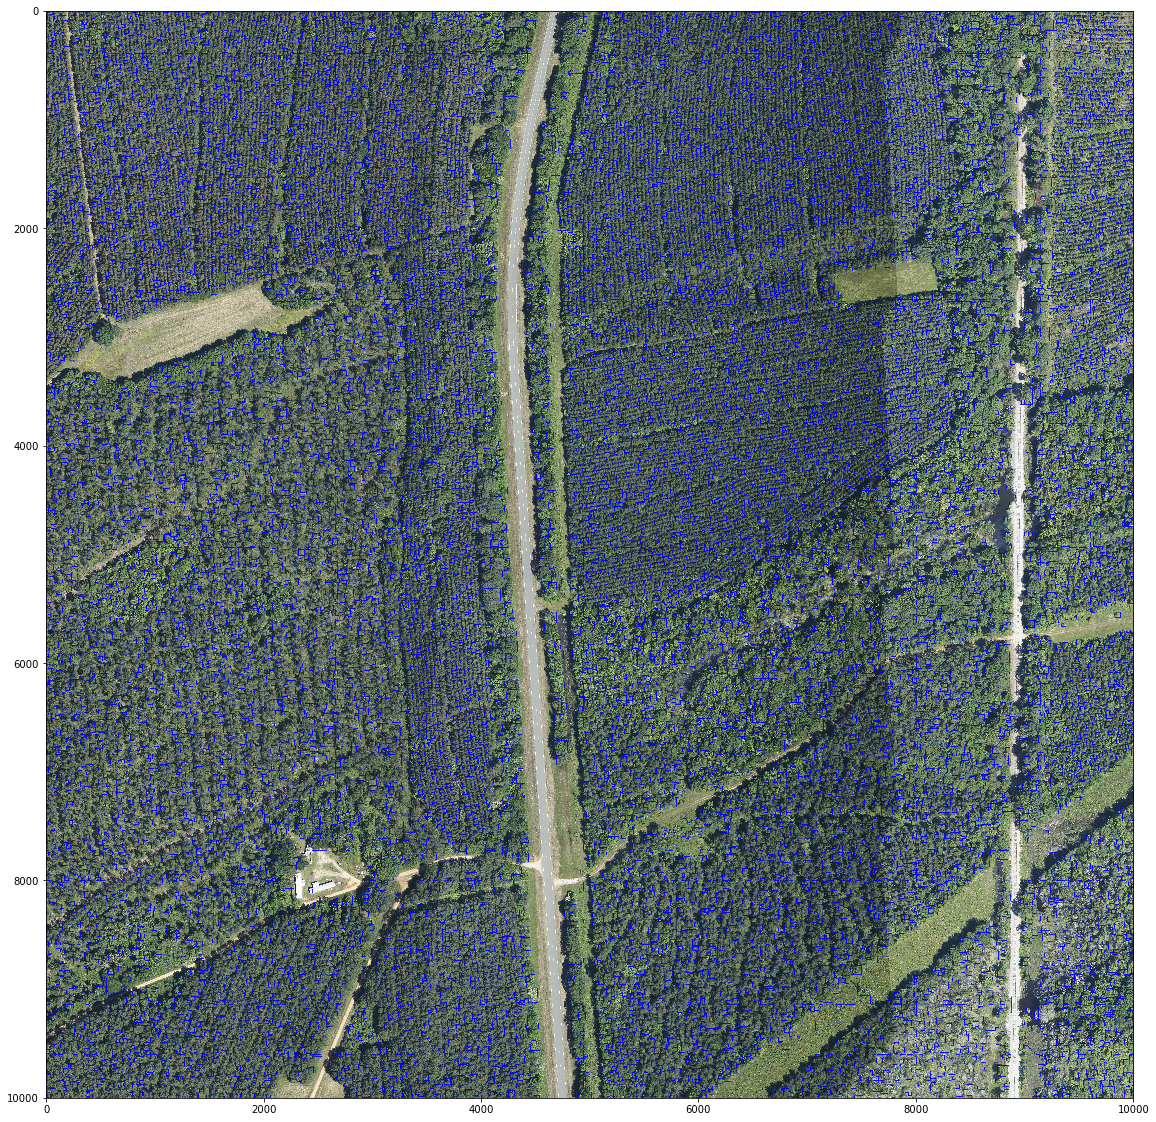

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(prediction)